# Res Net

In [48]:
import torch 
import numpy as np
from sklearn.model_selection import train_test_split
from torchvision.datasets import ImageFolder
from torchvision.transforms import Compose
from torchvision import transforms  
from torch.utils.data import DataLoader


import matplotlib.pyplot as plt
import os
import pandas as pd
from torchvision.io import read_image
from torch.utils.data import Dataset


device = "cuda" if torch.cuda.is_available() else "cpu"


In [49]:
print(device)


cpu


# Dataset


In [50]:
tf = Compose([
     transforms.ConvertImageDtype(torch.float),
     transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
     transforms.Pad(1)
 ])

class CustomCountriesDataset(Dataset):
    def __init__(self, df, transform=tf, target_transform=None):
        self.df = df
        self.transform = transform
    
    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        image = read_image(self.df.iloc[idx, 0])
        label = self.df.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        return image, label

In [51]:
df = pd.read_csv("../output.csv")

X = df['images']
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
train_data = pd.concat([X_train,y_train], axis = 1)
test_data = pd.concat([X_test, y_test], axis=1)

print(test_data)




                                                  images  class
50486  /Users/ethan/Documents/GeoGuessrAI/data/malta2...      3
36090  /Users/ethan/Documents/GeoGuessrAI/data/taiwan...      2
24854  /Users/ethan/Documents/GeoGuessrAI/data/andorr...      1
40389  /Users/ethan/Documents/GeoGuessrAI/data/taiwan...      2
48141  /Users/ethan/Documents/GeoGuessrAI/data/malta2...      3
...                                                  ...    ...
10035  /Users/ethan/Documents/GeoGuessrAI/data/south-...      0
10423  /Users/ethan/Documents/GeoGuessrAI/data/south-...      0
45224  /Users/ethan/Documents/GeoGuessrAI/data/taiwan...      2
51605  /Users/ethan/Documents/GeoGuessrAI/data/malta2...      3
8090   /Users/ethan/Documents/GeoGuessrAI/data/south-...      0

[16670 rows x 2 columns]


In [52]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import Compose
import numpy as np

Feature batch shape: torch.Size([64, 3, 226, 226])
Labels batch shape: torch.Size([64])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


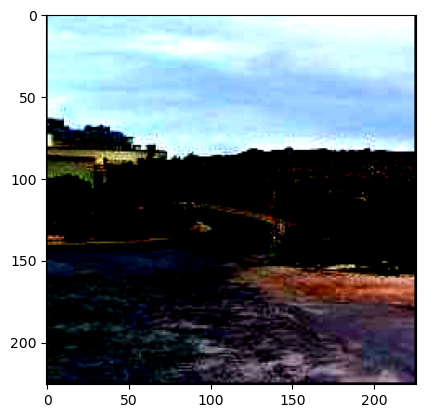

Label: 3


'\nprint(countries_dataset.classes)\nprint(countries_dataset.class_to_idx)'

In [53]:
train_dataset = CustomCountriesDataset(train_data, transform=tf)
test_dataset = CustomCountriesDataset(test_data, transform=tf)

bsz = 64
test_dataloader = DataLoader(test_dataset, batch_size=bsz, shuffle=False)
train_dataloader = DataLoader(train_dataset, batch_sampler=bsz, shuffle=False)


train_features, train_labels = next(iter(test_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
image_np = img.numpy().transpose((1, 2, 0))
plt.imshow(image_np)
plt.show()
print(f"Label: {label}")

"""
print(countries_dataset.classes)
print(countries_dataset.class_to_idx)"""

